In [1]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

%matplotlib inline

# mac OS 에서 한글이 깨진다면 참고.
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Ada Boost

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size = 0.3,
                                                   shuffle = True)

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=9, algorithm='SAMME.R',
                              learning_rate=0.5).fit(X_train, y_train)

#### 에이다 부스트의 파라미터
  - base_estimator : 모델을 정해주는 파라미터이다. 값을 지정해주지 않으면 기본값으로 DecisionTreeClassifier(max_depth=1)로 설정된다.  
  - learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 설정한다. 클수록 보정을 강하게 한다, 기본값은 1.0

- algorithm : 사이킷런에서 제공하는 에이다 부스트는 SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function)이라는 알고리즘으로 구현되어 있다. 기본값은 SAMME.R(R은 Real) 이다.  
  - SAMME는 AdaBoost와 알고리즘은 유사하다. 다만 n번째 모델의 가중치를 구하는 부분만 AdaBoost와 다른 수식을 가진다. (수식을 넣어서 두 개의 수식을 비교 * 이론에서 안 다루었을 경우에!), 만약 클래스의 수가 2인 이중 분류의 경우에는 SAMME는 AdaBoost와 동일한 알고리즘이 된다. SAMME.R은 모델의 예측값을 이용하는게 아니라 클래스의 확률을 기반으로 한다.

In [ ]:
model_ada.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=144370648, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=397052579, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=No

- 랜덤 포레스트와 같이 에이다 부스트의 예측기들은 estimators_에 저장된다.

In [ ]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flag

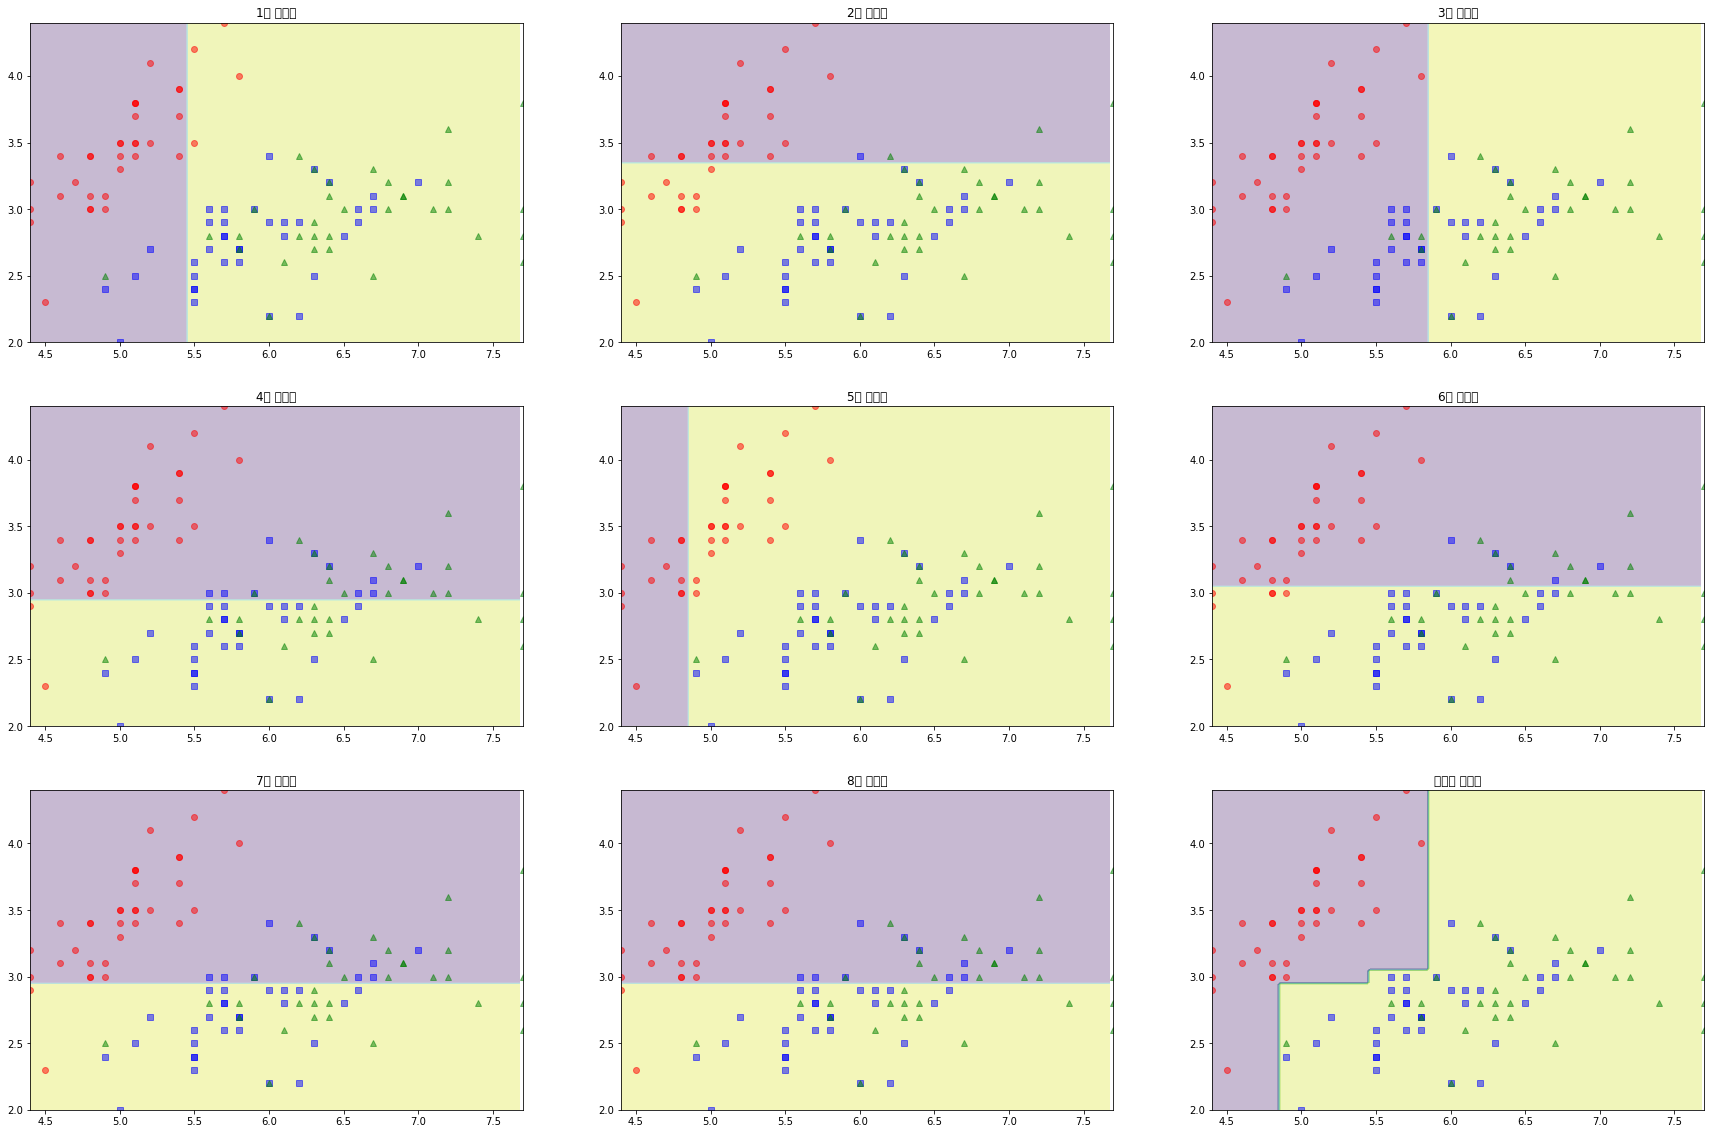

In [ ]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(model_ada.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(model_ada.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(model_ada.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(model_ada.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(model_ada.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(model_ada.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(model_ada.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(model_ada.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(model_ada, X_train, y_train)

- 에이다 부스트는 깊이가 1인 결정트리를 사용한다. 깊이가 1이기 때문에 경계선이 하나만 표시 되어있다. 앙상블된 모델역시 경계선이 단순하게 그려져있다.

In [ ]:
model_ada.predict_proba(X_test)

array([[3.98638265e-04, 5.22964209e-01, 4.76637153e-01],
       [3.98638265e-04, 5.22964209e-01, 4.76637153e-01],
       [6.38332772e-03, 6.46975188e-01, 3.46641484e-01],
       [7.77171625e-01, 1.40364079e-01, 8.24642964e-02],
       [1.53333414e-02, 5.75046792e-01, 4.09619867e-01],
       [7.77171625e-01, 1.40364079e-01, 8.24642964e-02],
       [9.95510547e-01, 2.78764815e-03, 1.70180514e-03],
       [9.92728865e-01, 4.75305187e-03, 2.51808363e-03],
       [1.53333414e-02, 5.75046792e-01, 4.09619867e-01],
       [9.82225989e-01, 1.27094697e-02, 5.06454122e-03],
       [3.98638265e-04, 5.22964209e-01, 4.76637153e-01],
       [3.98638265e-04, 5.22964209e-01, 4.76637153e-01],
       [5.78828750e-01, 2.51609404e-01, 1.69561846e-01],
       [1.53333414e-02, 5.75046792e-01, 4.09619867e-01],
       [2.56923634e-01, 5.16065409e-01, 2.27010957e-01],
       [6.82011164e-01, 2.10610656e-01, 1.07378180e-01],
       [1.53333414e-02, 5.75046792e-01, 4.09619867e-01],
       [1.53333414e-02, 5.75046

- algorithm이 SAMME.R인 경우에는 predict_proba를 이용해 각 클래스의 확률을 알 수 있다.

In [ ]:
model_ada.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1])

- 예측 결과와 클래스의 확률을 비교해보자.

In [ ]:
print('SAMME.R의 train score : {}'.format(model_ada.score(X_train, y_train)))
print('SAMME.R의 test score : {}'.format(model_ada.score(X_test, y_test)))

SAMME.R의 train score : 0.6857142857142857
SAMME.R의 test score : 0.6


In [ ]:
ada_samme = AdaBoostClassifier(n_estimators=9, algorithm='SAMME',
                              learning_rate=0.5).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_te

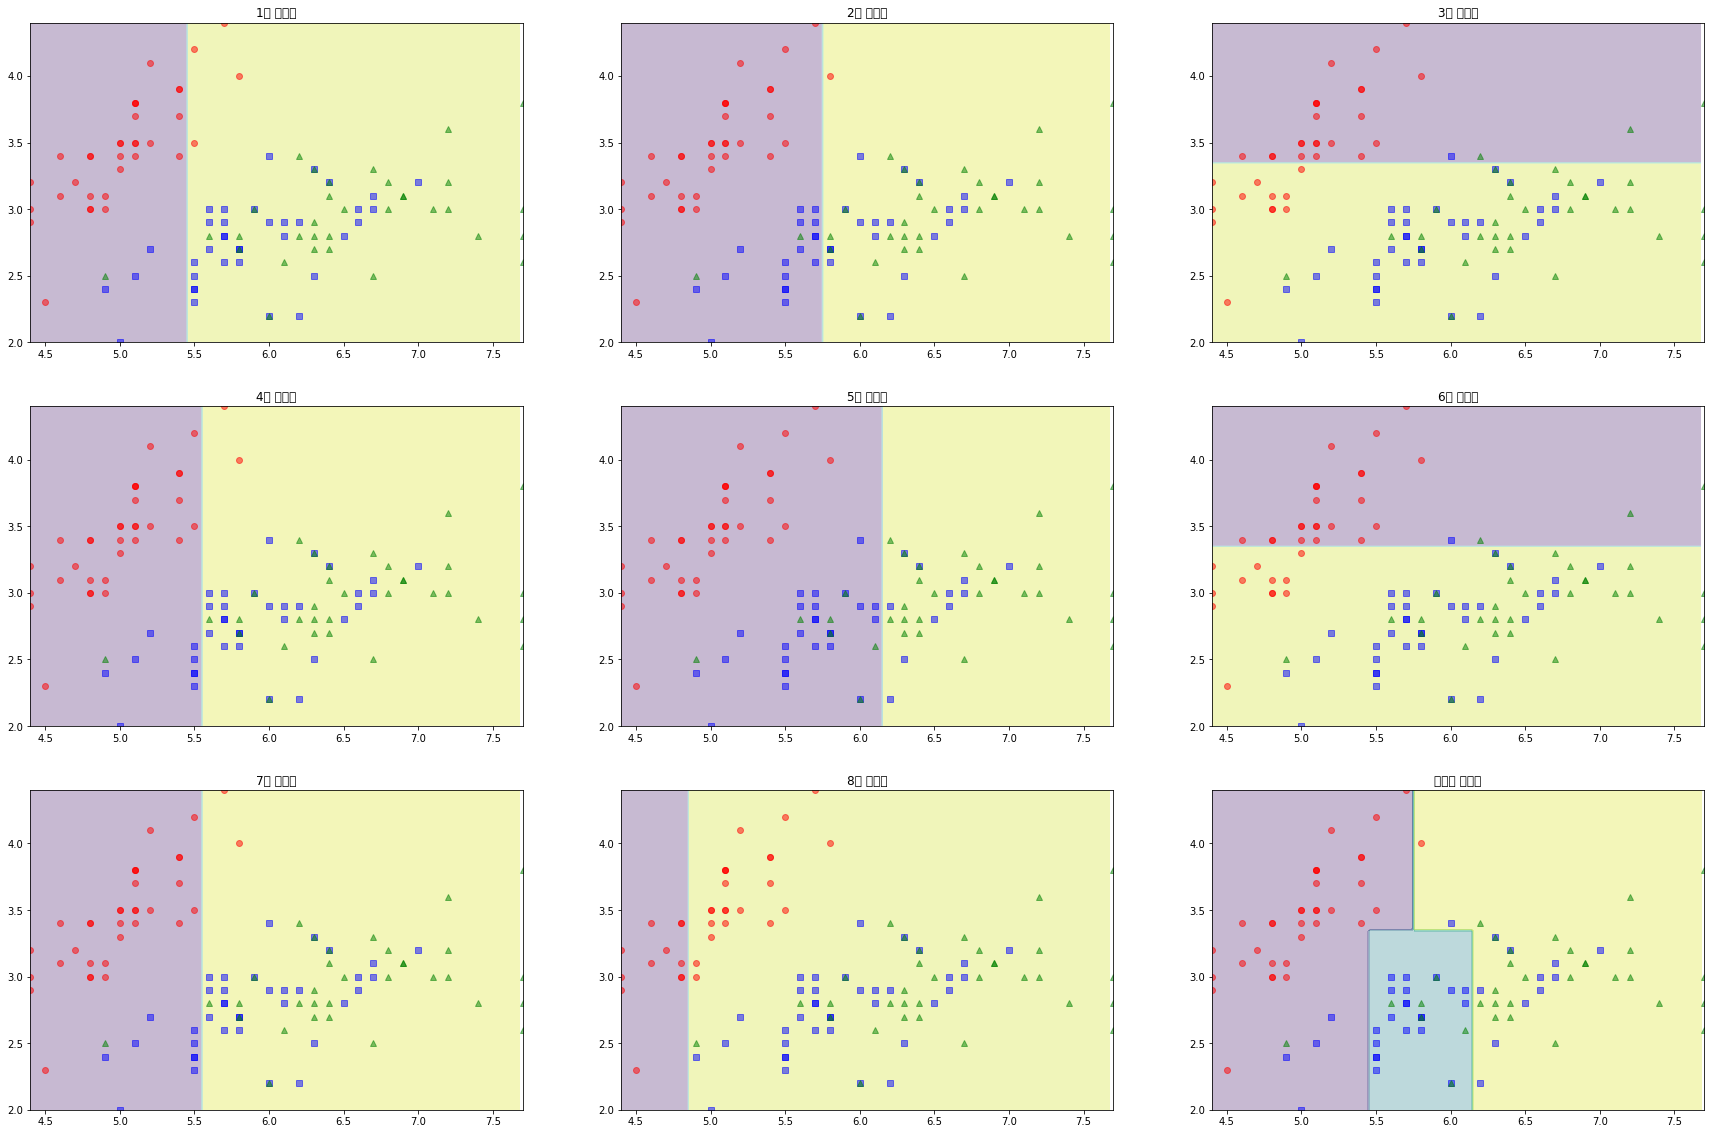

In [ ]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(ada_samme.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(ada_samme.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(ada_samme.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(ada_samme.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(ada_samme.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(ada_samme.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(ada_samme.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(ada_samme.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(ada_samme, X_train, y_train)

In [ ]:
print('SAMME의 train score : {}'.format(ada_samme.score(X_train, y_train)))
print('SAMME의 train score : {}'.format(ada_samme.score(X_test, y_test)))

SAMME의 train score : 0.7714285714285715
SAMME의 train score : 0.7555555555555555


- SAMME보다는 SAMME.R을 이용한 에이다부스트 모델이 성능이 더 높게 나오는 것을 확인할 수 있다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2,
                                                   shuffle = True)

randf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5).fit(X_train, y_train)

In [ ]:
randf.feature_importances_

array([0.03644063, 0.01510705, 0.1050048 , 0.03759042, 0.00354496,
       0.02222978, 0.05797567, 0.09386768, 0.00309545, 0.00383382,
       0.02370327, 0.00433753, 0.0142767 , 0.04690075, 0.00507963,
       0.00519636, 0.00428985, 0.00263308, 0.00402135, 0.00511234,
       0.08018822, 0.01629849, 0.09089672, 0.0766508 , 0.01326256,
       0.01859131, 0.05733594, 0.13679262, 0.01104645, 0.00469579])

In [ ]:
ada.feature_importances_

array([0.  , 0.06, 0.  , 0.  , 0.04, 0.04, 0.  , 0.06, 0.  , 0.  , 0.06,
       0.  , 0.  , 0.08, 0.  , 0.06, 0.02, 0.  , 0.  , 0.08, 0.02, 0.14,
       0.08, 0.06, 0.08, 0.  , 0.04, 0.08, 0.  , 0.  ])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

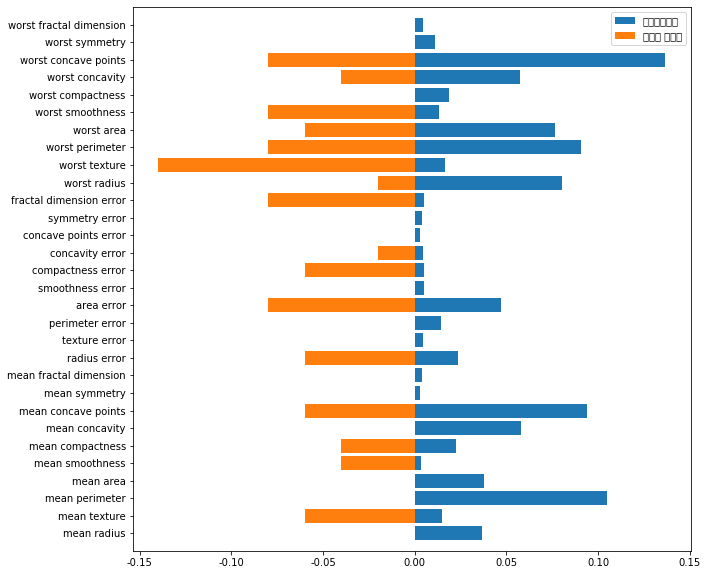

In [ ]:
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = ada.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.legend(['랜덤포레스트', '에이다 부스트'])
plt.show()

- 에이다 부스트와 랜덤포레스트의 특성 중요도를 비교해 보았다.  
- 0의 값을 가진 특성들도 있고 다른 모델에서는 중요하게 생각하지 않은 특성을 오히려 중요하게 보는 경우도 있다.